Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UKCrime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248424 entries, 0 to 248423
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Financial Year          248424 non-null  object
 1   Financial Quarter       248424 non-null  int64 
 2   Force Name              248424 non-null  object
 3   Offence Description     248424 non-null  object
 4   Offence Group           248424 non-null  object
 5   Offence Subgroup        248424 non-null  object
 6   Offence Code            248424 non-null  object
 7   Number of Offences      248424 non-null  int64 
 8   OffenceCode             248424 non-null  object
 9   Offencedescription      248424 non-null  object
 10  OldPRCoffencegroup      248424 non-null  object
 11  Oldoffencesub-group     138556 non-

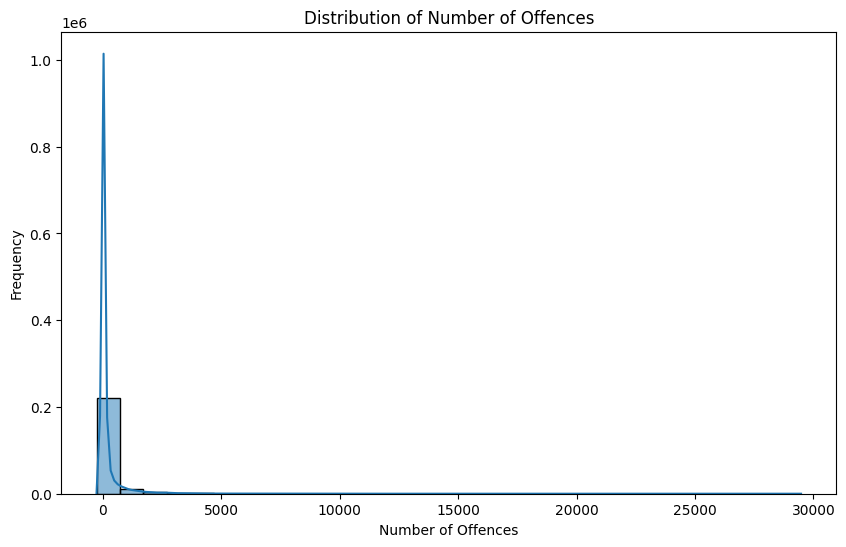

ValueError: could not convert string to float: '2012/13'

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Set Working Directory to the UKCrime folder
%cd /content/drive/MyDrive/UKCrime

# Import necessary Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Read the dataset from a CSV file and display information about it
merged_data = pd.read_csv('/content/drive/MyDrive/UKCrime/final_data.csv')
merged_data.info()

# Check for missing values in the dataset
merged_data.isna().sum()

# Replace missing values with 'novalues'
merged_data = merged_data.fillna('novalues')

# Drop specified duplicate columns
columns_to_drop = ['OffenceCode', 'Offencedescription', 'NewONSoffencegroup', 'NewONSsub-offencegroup']
df_dropped = merged_data.drop(columns=columns_to_drop)
df_dropped.head()

# Assign df_dropped to df1
df1 = df_dropped

# Import additional modules
import seaborn as sns
import matplotlib.pyplot as plt

# Display columns and data types in df1
df1.columns
df1.dtypes

# Display descriptive statistics for numeric columns
df1.describe()

# Display the number of unique values in each column
df1.nunique()

# Assign df1 to df2
df2 = df1

# Remove duplicate rows in df2
df2.drop_duplicates(inplace=True)

# Display the number of unique values in specified categorical columns
unique_values_count = df2[['Force Name', 'Offence Group', 'Offence Subgroup']].nunique()
unique_values_count

# Visualize the distribution of the 'Number of Offences' column
plt.figure(figsize=(10, 6))
sns.histplot(df2['Number of Offences'], bins=30, kde=True)
plt.title('Distribution of Number of Offences')
plt.xlabel('Number of Offences')
plt.ylabel('Frequency')
plt.show()

# Explore correlations between numeric columns and visualize them using a heatmap
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

# Check for outliers in the 'Number of Offences' column using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Number of Offences', data=df2)
plt.title('Box Plot of Number of Offences')
plt.show()

# Handle negative values by replacing them with their absolute values
columns_to_replace = ['Number of Offences']
df2[columns_to_replace] = df2[columns_to_replace].abs()

# Display box plot after handling negative values
plt.figure(figsize=(12, 6))
sns.boxplot(x='Number of Offences', data=df2)
plt.title('Box Plot of Number of Offences')
plt.show()

# Assign df1 to df2
df2 = df1

# Display summary statistics for df1
summary_statistics = df1.describe(include='all')
print(summary_statistics)

# Save cleaned and preprocessed DataFrame to a new CSV file
df2.to_csv('cleaned_and_preprocessed_data.csv', index=False)

# Read the new data from the saved CSV file
new_data = pd.read_csv('/content/drive/MyDrive/UKCrime/cleaned_and_preprocessed_data.csv')
new_data.head()
new_data.tail()
new_data.shape
new_data.nunique()
new_data.corr()

# Assign new_data to df3
df3 = new_data

# Install PySpark library
!pip install pyspark

# Import necessary libraries for PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg

# Create a Spark session
spark = SparkSession.builder.appName("CrimeAnalysis").getOrCreate()

# Convert the Pandas DataFrame to a Spark DataFrame
spark_df = spark.createDataFrame(new_data)

# Show the schema of the Spark DataFrame
spark_df.printSchema()

# Display the rows of the Spark DataFrame
spark_df.show()

# Calculate the total number of offences per financial year using Spark
total_offences_by_year = spark_df.groupBy("Financial Year").agg(sum("Number of Offences").alias("Total Offences")).orderBy("Financial Year")
total_offences_by_year.show()

# Calculate the average number of offences per financial quarter using Spark
average_offences_by_quarter = spark_df.groupBy("Financial Quarter").agg(avg("Number of Offences").alias("Average Offences")).orderBy("Financial Quarter")
average_offences_by_quarter.show()

# Load the cleaned data from the CSV file
file_path_cleaned = '/content/drive/MyDrive/UKCrime/cleaned_and_preprocessed_data.csv'
data = pd.read_csv(file_path_cleaned)

# Handling missing values, removing duplicates, and handling negative values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = np.abs(data[numeric_cols])

# Display information after preprocessing
print("\nData after preprocessing:")
print(data.info())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")

# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
target_column = 'Number of Offences'
X = data.drop(columns=[target_column])
y = data[target_column]

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline with preprocessing and linear regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Create a pipeline with preprocessing and decision tree regression
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model.fit(X_train, y_train)

# Fit the decision tree regression model
tree_model.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate the decision tree regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Display metrics for both models
print("\nLinear Regression Metrics:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

print("\nDecision Tree Regression Metrics:")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-squared: {r2_tree:.2f}")

# Plot the predicted vs actual values for both models
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Linear Regression)")
plt.title("Actual vs Predicted Values for Linear Regression")

# Decision Tree Regression plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Decision Tree Regression)")
plt.title("Actual vs Predicted Values for Decision Tree Regression")

plt.tight_layout()
plt.show()